<a href="https://colab.research.google.com/github/UttaraKet1607/Hyperparameter-Optimization-Using-PSO/blob/main/Hyperparameter_Optimization_Using_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hyperparameter Optimization of CNN using Particle Swarm Optimization on Malarial cell images

## 1) Data gathering 
[Download dataset](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)
### (a) Importing the required libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input")) # Input data files are available in the "../input/" directory.

['cell_images']


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


### (b) Understanding the files in different data directories

In [ ]:
parasitized_data = os.listdir('../input/cell_images/cell_images/Parasitized/') #specify the path of the required directory
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../input/cell_images/cell_images/Uninfected/') #specify the path of the required directory
print('\n')
print(uninfected_data[:10])

['C99P60ThinF_IMG_20150918_141001_cell_93.png', 'C99P60ThinF_IMG_20150918_141001_cell_133.png', 'C101P62ThinF_IMG_20150918_151942_cell_60.png', 'C162P123ThinF_IMG_20151116_102655_cell_163.png', 'C52P13thinF_IMG_20150725_124830_cell_174.png', 'C136P97ThinF_IMG_20151005_141803_cell_121.png', 'C48P9thinF_IMG_20150721_161243_cell_157.png', 'C137P98ThinF_IMG_20151005_163901_cell_80.png', 'C51AP12thinF_IMG_20150724_155046_cell_94.png', 'C51AP12thinF_IMG_20150724_161126_cell_118.png']


['C203ThinF_IMG_20151029_102123_cell_51.png', 'C238NThinF_IMG_20151207_114038_cell_84.png', 'C119P80ThinF_IMG_20151002_124304_cell_112.png', 'C39P4thinF_original_IMG_20150622_111723_cell_33.png', 'C101P62ThinF_IMG_20150918_151149_cell_63.png', 'C180P141NThinF_IMG_20151201_165601_cell_115.png', 'C95P56ThinF_IMG_20150821_171603_cell_75.png', 'C236ThinF_IMG_20151127_102516_cell_177.png', 'C125P86ThinF_IMG_20151004_102053_cell_83.png', 'C49P10thinF_IMG_20150724_102330_cell_160.png']


## 2) Data Visualization
### Class: Parasitized 

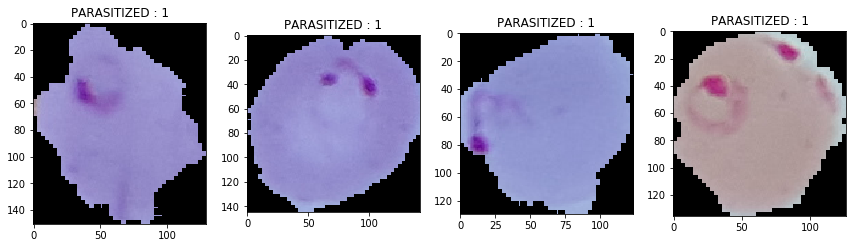

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

### Class: Uninfected

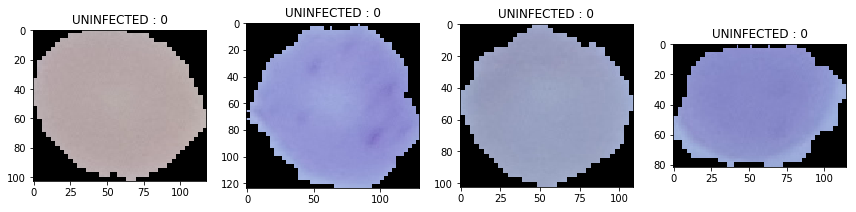

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

## 3) Data Preprocessing

In [ ]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../input/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

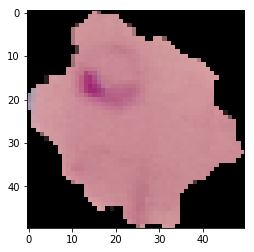

In [ ]:
plt.imshow(data[0])
plt.show()

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

## 4) Splitting the data into train and test followed by label encoding

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


## 5) Hyperparameter optimization of CNN

In [ ]:
!pip install hyperactive==0.3.1  #https://pypi.org/project/hyperactive/0.3.1/
import hyperactive as hyp

You are using pip version 18.1, however version 21.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
# this defines the structure of the model and print("time: {}".format(t2-t1))the search space in each layer
search_config = {
    "keras.compile.0": {"loss": ["binary_crossentropy"], "optimizer": ["adam"]},
    "keras.fit.0": {"epochs": [15], "batch_size": [500], "verbose": [2]},
    "keras.layers.Conv2D.1": {
        "filters": [32, 64, 128],
        #"kernel_size": range(3, 4),
        "kernel_size": [(3, 3)],
        "activation": ["relu"],
        "input_shape": [(50, 50, 3)],
    },
    "keras.layers.MaxPooling2D.2": {"pool_size": [(2, 2)]},
    "keras.layers.Conv2D.3": {
        "filters": [16, 32, 64, 128],
        "kernel_size": [(3, 3)],
        "activation": ["relu"],
    },
    "keras.layers.MaxPooling2D.4": {"pool_size": [(2, 2)]},
    "keras.layers.Flatten.5": {},
    #"keras.layers.Dense.6": {"units": [30], "activation": ["relu"]},
    "keras.layers.Dense.6": {"units": range(30, 100, 10), "activation": ["relu"]},
    #"keras.layers.Dropout.7": {"rate": 0.4},
    "keras.layers.Dropout.7": {"rate": list(np.arange(0.2, 0.8, 0.2))},
    "keras.layers.Dense.8": {"units": [2], "activation": ["softmax"]},
}

start_point = {
    "keras.compile.0": {"loss": ["binary_crossentropy"], "optimizer": ["adam"]},
    "keras.fit.0": {"epochs": [15], "batch_size": [500], "verbose": [2]},
    "keras.layers.Conv2D.1": {
        "filters": [64],
        "kernel_size": [(3, 3)],
        "activation": ["relu"],
        "input_shape": [(50,50, 3)],
    },
    "keras.layers.MaxPooling2D.2": {"pool_size": [(2, 2)]},
    "keras.layers.Conv2D.3": {
        "filters": [32],
        "kernel_size": [(3, 3)],
        "activation": ["relu"],
    },
    "keras.layers.MaxPooling2D.4": {"pool_size": [(2, 2)]},
    "keras.layers.Flatten.5": {},
    "keras.layers.Dense.6": {"units": [30], "activation": ["relu"]},
    "keras.layers.Dropout.7": {"rate": [0.2]},
    "keras.layers.Dense.8": {"units": [2], "activation": ["softmax"]},
}

#https://pypi.org/project/hyperactive/0.3.1/ 
Optimizer = hyp.ParticleSwarmOptimizer(search_config, n_iter=5,warm_start=start_point, metric="accuracy", n_jobs=1, cv=5, verbosity=1, random_state=42, n_part=5, w=0.85, c_k=1.9, c_s=2.05)

In [ ]:
import time
t1 = time.time()
# search best hyperparameter for given data
h = Optimizer.fit(x_train, y_train)

t2 = time.time()
print("time: {}".format(t2-t1))

# predict from test data
Optimizer.predict(x_test)

# calculate accuracy score
score = Optimizer.score(x_test, y_test)

print("test score: {}".format(score))

Epoch 1/15
 - 5s - loss: 0.6532 - acc: 0.6087
Epoch 2/15
 - 2s - loss: 0.6110 - acc: 0.6745
Epoch 3/15
 - 2s - loss: 0.5413 - acc: 0.7423
Epoch 4/15
 - 2s - loss: 0.4874 - acc: 0.7804
Epoch 5/15
 - 2s - loss: 0.3895 - acc: 0.8368
Epoch 6/15
 - 2s - loss: 0.3148 - acc: 0.8775
Epoch 7/15
 - 2s - loss: 0.2785 - acc: 0.8895
Epoch 8/15
 - 2s - loss: 0.2403 - acc: 0.9053
Epoch 9/15
 - 2s - loss: 0.2103 - acc: 0.9156
Epoch 10/15
 - 2s - loss: 0.1950 - acc: 0.9218
Epoch 11/15
 - 2s - loss: 0.1837 - acc: 0.9274
Epoch 12/15
 - 2s - loss: 0.1895 - acc: 0.9292
Epoch 13/15
 - 2s - loss: 0.1653 - acc: 0.9341
Epoch 14/15
 - 2s - loss: 0.1584 - acc: 0.9418
Epoch 15/15
 - 2s - loss: 0.1537 - acc: 0.9477
22046/22046 [==============================] - 1s 66us/step


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/15
 - 2s - loss: 0.6453 - acc: 0.6179
Epoch 2/15
 - 1s - loss: 0.5827 - acc: 0.7011
Epoch 3/15
 - 1s - loss: 0.5407 - acc: 0.7391
Epoch 4/15
 - 1s - loss: 0.4796 - acc: 0.7804
Epoch 5/15
 - 1s - loss: 0.4159 - acc: 0.8177
Epoch 6/15
 - 1s - loss: 0.3192 - acc: 0.8704
Epoch 7/15
 - 1s - loss: 0.2688 - acc: 0.8938
Epoch 8/15
 - 1s - loss: 0.2251 - acc: 0.9107
Epoch 9/15
 - 1s - loss: 0.2066 - acc: 0.9183
Epoch 10/15
 - 1s - loss: 0.1959 - acc: 0.9235
Epoch 11/15
 - 1s - loss: 0.2044 - acc: 0.9218
Epoch 12/15
 - 1s - loss: 0.1731 - acc: 0.9341
Epoch 13/15
 - 1s - loss: 0.1630 - acc: 0.9418
Epoch 14/15
 - 1s - loss: 0.1553 - acc: 0.9442
Epoch 15/15
 - 1s - loss: 0.1500 - acc: 0.9466
22046/22046 [==============================] - 1s 64us/step
Epoch 1/15
 - 2s - loss: 0.6693 - acc: 0.5900
Epoch 2/15
 - 2s - loss: 0.5916 - acc: 0.6968
Epoch 3/15
 - 2s - loss: 0.5325 - acc: 0.7492
Epoch 4/15
 - 2s - loss: 0.4387 - acc: 0.8131
Epoch 5/15
 - 2s - loss: 0.3213 - acc: 0.8712
Epoch 6/15
 - 

 20%|██        | 1/5 [02:29<09:56, 149.08s/it]

Epoch 1/15
 - 2s - loss: 0.6655 - acc: 0.5961
Epoch 2/15
 - 1s - loss: 0.6022 - acc: 0.6809
Epoch 3/15
 - 1s - loss: 0.5506 - acc: 0.7305
Epoch 4/15
 - 1s - loss: 0.5043 - acc: 0.7646
Epoch 5/15
 - 1s - loss: 0.4289 - acc: 0.8176
Epoch 6/15
 - 1s - loss: 0.3473 - acc: 0.8621
Epoch 7/15
 - 1s - loss: 0.2871 - acc: 0.8882
Epoch 8/15
 - 1s - loss: 0.2446 - acc: 0.9070
Epoch 9/15
 - 1s - loss: 0.2201 - acc: 0.9165
Epoch 10/15
 - 1s - loss: 0.2047 - acc: 0.9208
Epoch 11/15
 - 1s - loss: 0.1908 - acc: 0.9285
Epoch 12/15
 - 1s - loss: 0.1798 - acc: 0.9332
Epoch 13/15
 - 1s - loss: 0.1749 - acc: 0.9370
Epoch 14/15
 - 1s - loss: 0.1635 - acc: 0.9414
Epoch 15/15
 - 1s - loss: 0.1535 - acc: 0.9457
22046/22046 [==============================] - 2s 80us/step
Epoch 1/15
 - 3s - loss: 0.6738 - acc: 0.5870
Epoch 2/15
 - 2s - loss: 0.6042 - acc: 0.6786
Epoch 3/15
 - 2s - loss: 0.5299 - acc: 0.7446
Epoch 4/15
 - 2s - loss: 0.4260 - acc: 0.8123
Epoch 5/15
 - 2s - loss: 0.2868 - acc: 0.8895
Epoch 6/15
 - 

 40%|████      | 2/5 [05:07<07:35, 151.78s/it]

Epoch 1/15
 - 3s - loss: 0.6557 - acc: 0.6173
Epoch 2/15
 - 2s - loss: 0.5772 - acc: 0.7118
Epoch 3/15
 - 2s - loss: 0.5083 - acc: 0.7663
Epoch 4/15
 - 2s - loss: 0.3806 - acc: 0.8465
Epoch 5/15
 - 2s - loss: 0.2961 - acc: 0.8879
Epoch 6/15
 - 2s - loss: 0.2324 - acc: 0.9141
Epoch 7/15
 - 2s - loss: 0.2224 - acc: 0.9206
Epoch 8/15
 - 2s - loss: 0.1839 - acc: 0.9359
Epoch 9/15
 - 2s - loss: 0.1802 - acc: 0.9357
Epoch 10/15
 - 2s - loss: 0.1609 - acc: 0.9463
Epoch 11/15
 - 2s - loss: 0.1508 - acc: 0.9510
Epoch 12/15
 - 2s - loss: 0.1414 - acc: 0.9543
Epoch 13/15
 - 2s - loss: 0.1331 - acc: 0.9562
Epoch 14/15
 - 2s - loss: 0.1262 - acc: 0.9585
Epoch 15/15
 - 2s - loss: 0.1176 - acc: 0.9607
22046/22046 [==============================] - 2s 95us/step
Epoch 1/15
 - 4s - loss: 0.6889 - acc: 0.5835
Epoch 2/15
 - 3s - loss: 0.5858 - acc: 0.6984
Epoch 3/15
 - 3s - loss: 0.5163 - acc: 0.7520
Epoch 4/15
 - 3s - loss: 0.4224 - acc: 0.8132
Epoch 5/15
 - 3s - loss: 0.2721 - acc: 0.8949
Epoch 6/15
 - 

 60%|██████    | 3/5 [07:47<05:08, 154.47s/it]

Epoch 1/15
 - 4s - loss: 0.6712 - acc: 0.6102
Epoch 2/15
 - 2s - loss: 0.5959 - acc: 0.6864
Epoch 3/15
 - 2s - loss: 0.5331 - acc: 0.7439
Epoch 4/15
 - 2s - loss: 0.4149 - acc: 0.8284
Epoch 5/15
 - 2s - loss: 0.2678 - acc: 0.9013
Epoch 6/15
 - 2s - loss: 0.2022 - acc: 0.9305
Epoch 7/15
 - 2s - loss: 0.1667 - acc: 0.9419
Epoch 8/15
 - 2s - loss: 0.1545 - acc: 0.9465
Epoch 9/15
 - 2s - loss: 0.1463 - acc: 0.9491
Epoch 10/15
 - 2s - loss: 0.1369 - acc: 0.9525
Epoch 11/15
 - 2s - loss: 0.1267 - acc: 0.9559
Epoch 12/15
 - 2s - loss: 0.1146 - acc: 0.9614
Epoch 13/15
 - 2s - loss: 0.1140 - acc: 0.9604
Epoch 14/15
 - 2s - loss: 0.1017 - acc: 0.9655
Epoch 15/15
 - 2s - loss: 0.0908 - acc: 0.9687
22046/22046 [==============================] - 3s 143us/step
Epoch 1/15
 - 4s - loss: 0.6740 - acc: 0.5913
Epoch 2/15
 - 3s - loss: 0.6114 - acc: 0.6810
Epoch 3/15
 - 3s - loss: 0.5517 - acc: 0.7287
Epoch 4/15
 - 3s - loss: 0.4193 - acc: 0.8297
Epoch 5/15
 - 3s - loss: 0.3720 - acc: 0.8565
Epoch 6/15
 -

 80%|████████  | 4/5 [11:13<02:49, 169.68s/it]

Epoch 1/15
 - 4s - loss: 0.6656 - acc: 0.5930
Epoch 2/15
 - 2s - loss: 0.5764 - acc: 0.7029
Epoch 3/15
 - 2s - loss: 0.5029 - acc: 0.7593
Epoch 4/15
 - 2s - loss: 0.3602 - acc: 0.8514
Epoch 5/15
 - 2s - loss: 0.2392 - acc: 0.9116
Epoch 6/15
 - 2s - loss: 0.2066 - acc: 0.9242
Epoch 7/15
 - 2s - loss: 0.1687 - acc: 0.9413
Epoch 8/15
 - 2s - loss: 0.1497 - acc: 0.9473
Epoch 9/15
 - 2s - loss: 0.1357 - acc: 0.9521
Epoch 10/15
 - 2s - loss: 0.1262 - acc: 0.9561
Epoch 11/15
 - 2s - loss: 0.1150 - acc: 0.9604
Epoch 12/15
 - 2s - loss: 0.1041 - acc: 0.9646
Epoch 13/15
 - 2s - loss: 0.0980 - acc: 0.9672
Epoch 14/15
 - 2s - loss: 0.0826 - acc: 0.9727
Epoch 15/15
 - 2s - loss: 0.0771 - acc: 0.9736
22046/22046 [==============================] - 3s 136us/step
Epoch 1/15
 - 5s - loss: 0.6889 - acc: 0.5721
Epoch 2/15
 - 3s - loss: 0.6005 - acc: 0.6829
Epoch 3/15
 - 3s - loss: 0.5531 - acc: 0.7207
Epoch 4/15
 - 3s - loss: 0.4859 - acc: 0.7699
Epoch 5/15
 - 3s - loss: 0.3664 - acc: 0.8453
Epoch 6/15
 -


 accuracy 0.9834890682738608
start_point = {'keras.compile.0': {'loss': ['binary_crossentropy'], 'optimizer': ['adam']}, 'keras.fit.0': {'epochs': [15], 'batch_size': [500], 'verbose': [2]}, 'keras.layers.Conv2D.1': {'filters': [128], 'kernel_size': [(3, 3)], 'activation': ['relu'], 'input_shape': [(50, 50, 3)]}, 'keras.layers.MaxPooling2D.2': {'pool_size': [(2, 2)]}, 'keras.layers.Conv2D.3': {'filters': [128], 'kernel_size': [(3, 3)], 'activation': ['relu']}, 'keras.layers.MaxPooling2D.4': {'pool_size': [(2, 2)]}, 'keras.layers.Flatten.5': {}, 'keras.layers.Dense.6': {'units': [90], 'activation': ['relu']}, 'keras.layers.Dropout.7': {'rate': [0.2]}, 'keras.layers.Dense.8': {'units': [2], 'activation': ['softmax']}}
Epoch 1/1
  896/22046 [>.............................] - ETA: 3s - loss: 0.2519 - acc: 0.9152

22046/22046 [==============================] - 4s 174us/step - loss: 0.1928 - acc: 0.9311
time: 909.6929335594177
5512/5512 [==============================] - 0s 85us/step
test score: 0.9426705370101597


# THANK YOU!